In [5]:
import pandas as pd
csv_file_path1 = "CTU13_Attack_Traffic.csv"
csv_file_path2 = "CTU13_Normal_Traffic.csv"

In [6]:
df1 = pd.read_csv(csv_file_path1)
df2 = pd.read_csv(csv_file_path2)
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_csv_file_path = 'FINAL YEAR PROJECT.csv'
combined_df.to_csv(combined_csv_file_path, index=False)
print(f"Combined CSV file saved to {combined_csv_file_path}")

Combined CSV file saved to FINAL YEAR PROJECT.csv


In [7]:
!pip install scikit-learn

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [9]:
#loading data from csv files topandas Dataframe
CTU13_data = pd.read_csv('FINAL YEAR PROJECT.csv')

In [10]:
#Print the first 5 rows of the datframe
CTU13_data.head()

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,59086131,7,1,0,0,0,0,0.000000,0.000000,...,0,2987276.0,0.0,2987276,2987276,1.869962e+07,19471121.45,41116855,5999291,1
1,1,12452268,37,1,2408,68,68,50,65.081081,6.726310,...,37,0.0,0.0,0,0,0.000000e+00,0.00,0,0,1
2,2,118741070,5,4,170,682,45,22,34.000000,10.440307,...,5,2276383.0,0.0,2276383,2276383,1.161281e+08,0.00,116128125,116128125,1
3,3,180643,25,11,180,25790,90,0,7.200000,24.919872,...,2,0.0,0.0,0,0,0.000000e+00,0.00,0,0,1
4,4,440,4,1,0,0,0,0,0.000000,0.000000,...,0,0.0,0.0,0,0,0.000000e+00,0.00,0,0,1


In [11]:
CTU13_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92212 entries, 0 to 92211
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         92212 non-null  int64  
 1   Flow Duration      92212 non-null  int64  
 2   Tot Fwd Pkts       92212 non-null  int64  
 3   Tot Bwd Pkts       92212 non-null  int64  
 4   TotLen Fwd Pkts    92212 non-null  int64  
 5   TotLen Bwd Pkts    92212 non-null  int64  
 6   Fwd Pkt Len Max    92212 non-null  int64  
 7   Fwd Pkt Len Min    92212 non-null  int64  
 8   Fwd Pkt Len Mean   92212 non-null  float64
 9   Fwd Pkt Len Std    92212 non-null  float64
 10  Bwd Pkt Len Max    92212 non-null  int64  
 11  Bwd Pkt Len Min    92212 non-null  int64  
 12  Bwd Pkt Len Mean   92212 non-null  float64
 13  Bwd Pkt Len Std    92212 non-null  float64
 14  Flow Byts/s        92212 non-null  float64
 15  Flow Pkts/s        92212 non-null  float64
 16  Flow IAT Mean      922

In [12]:
CTU13_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,92212.0,2.361719e+04,1.424188e+04,0.000000,11526.750000,23054.000000,3.458100e+04,5.331500e+04
Flow Duration,92212.0,1.070781e+07,2.708038e+07,1.000000,21822.000000,70141.000000,6.500053e+06,1.200000e+08
Tot Fwd Pkts,92212.0,1.094337e+01,2.490274e+02,0.000000,0.000000,1.000000,5.000000e+00,1.512300e+04
Tot Bwd Pkts,92212.0,1.297423e+01,1.881636e+02,1.000000,1.000000,2.000000,3.000000e+00,2.193300e+04
TotLen Fwd Pkts,92212.0,5.600684e+03,2.857600e+05,0.000000,0.000000,0.000000,3.100000e+01,2.226106e+07
TotLen Bwd Pkts,92212.0,1.021176e+04,2.096956e+05,0.000000,0.000000,116.000000,2.520000e+02,3.098852e+07
Fwd Pkt Len Max,92212.0,7.767729e+01,2.275951e+02,0.000000,0.000000,0.000000,3.000000e+01,2.920000e+03
Fwd Pkt Len Min,92212.0,6.762699e+00,3.340002e+01,0.000000,0.000000,0.000000,0.000000e+00,2.442000e+03
Fwd Pkt Len Mean,92212.0,2.297434e+01,7.653928e+01,0.000000,0.000000,0.000000,1.550000e+01,2.442000e+03
Fwd Pkt Len Std,92212.0,2.515681e+01,8.124057e+01,0.000000,0.000000,0.000000,0.000000e+00,8.429314e+02


In [13]:
#finding the no of rows and column
CTU13_data.shape

(92212, 59)

In [14]:
CTU13_data['Label'].value_counts()

Label
0    53314
1    38898
Name: count, dtype: int64

In [15]:
# getting the statistical measures of the dataset
CTU13_data.describe()

,Unnamed: 0,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,92212.000000,9.221200e+04,92212.000000,92212.000000,9.221200e+04,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,...,92212.000000,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,92212.000000
mean,23617.189129,1.070781e+07,10.943370,12.974233,5.600684e+03,1.021176e+04,77.677287,6.762699,22.974344,25.156811,...,5.779454,4.351079e+05,7.777843e+04,5.598308e+05,3.854448e+05,3.928015e+06,4.906831e+05,4.354137e+06,3.542860e+06,0.421832
std,14241.877212,2.708038e+07,249.027375,188.163610,2.857600e+05,2.096956e+05,227.595074,33.400015,76.539275,81.240567,...,204.037943,1.516574e+06,7.175262e+05,1.983055e+06,1.416148e+06,1.200553e+07,3.847780e+06,1.334522e+07,1.143824e+07,0.493855
min,0.000000,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,11526.750000,2.182200e+04,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,23054.000000,7.014100e+04,1.000000,2.000000,0.000000e+00,1.160000e+02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,34581.000000,6.500053e+06,5.000000,3.000000,3.100000e+01,2.520000e+02,30.000000,0.000000,15.500000,0.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,53315.000000,1.200000e+08,15123.000000,21933.000000,2.226106e+07,3.098852e+07,2920.000000,2442.000000,2442.000000,842.931393,...,15123.000000,1.082142e+08,5.927926e+07,1.082142e+08,1.082142e+08,1.199400e+08,7.695603e+07,1.199400e+08,1.199400e+08,1.000000


In [16]:
# Remove duplicates based on all columns
print(f'Shape of Loan Dataset before drop duplicated Row is: {CTU13_data.shape}')
loan_dataset = CTU13_data.drop_duplicates()
print(f'Shape of Loan Dataset After Drop Duplicated Row is: {CTU13_data.shape}')

Shape of Loan Dataset before drop duplicated Row is: (92212, 59)
Shape of Loan Dataset After Drop Duplicated Row is: (92212, 59)


In [17]:
# Dropping the 'Unnamed: 0' column as it seems to be just an index
data_cleaned = CTU13_data.drop(columns=['Unnamed: 0'])

# Calculate variance
variances = data_cleaned.var()

# Identify low variance features (threshold can be adjusted, here we use 0.01 as an arbitrary threshold)
low_variance_features = variances[variances < 0.01].index.tolist()

# Now, let's create a correlation matrix and identify highly correlated features
correlation_matrix = data_cleaned.corr().abs()

# Set a threshold for correlation to identify highly correlated features
correlation_threshold = 0.9

# Find pairs of highly correlated features
highly_correlated_pairs = [
    (i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns
    if i != j and correlation_matrix.loc[i, j] > correlation_threshold
]

low_variance_features, highly_correlated_pairs[:5]  # Displaying the first 5 highly correlated pairs


([],
 [('Flow Duration', 'Fwd IAT Tot'),
  ('Tot Bwd Pkts', 'Bwd Header Len'),
  ('TotLen Fwd Pkts', 'Fwd Act Data Pkts'),
  ('TotLen Bwd Pkts', 'Bwd Header Len'),
  ('Fwd Pkt Len Max', 'Fwd Pkt Len Std')])

In [18]:
# Checking the data types to identify categorical and continuous features

# Assuming categorical features would be object or category type, but since all are numerical, let's assume all are continuous initially
categorical_features = data_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_features = data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features, continuous_features


([],
 ['Flow Duration',
  'Tot Fwd Pkts',
  'Tot Bwd Pkts',
  'TotLen Fwd Pkts',
  'TotLen Bwd Pkts',
  'Fwd Pkt Len Max',
  'Fwd Pkt Len Min',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Std',
  'Bwd Pkt Len Max',
  'Bwd Pkt Len Min',
  'Bwd Pkt Len Mean',
  'Bwd Pkt Len Std',
  'Flow Byts/s',
  'Flow Pkts/s',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Flow IAT Max',
  'Flow IAT Min',
  'Fwd IAT Tot',
  'Fwd IAT Mean',
  'Fwd IAT Std',
  'Fwd IAT Max',
  'Fwd IAT Min',
  'Bwd IAT Tot',
  'Bwd IAT Mean',
  'Bwd IAT Std',
  'Bwd IAT Max',
  'Bwd IAT Min',
  'Bwd PSH Flags',
  'Fwd Header Len',
  'Bwd Header Len',
  'Fwd Pkts/s',
  'Bwd Pkts/s',
  'Pkt Len Min',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Std',
  'Pkt Len Var',
  'FIN Flag Cnt',
  'SYN Flag Cnt',
  'RST Flag Cnt',
  'ACK Flag Cnt',
  'Down/Up Ratio',
  'Pkt Size Avg',
  'Fwd Seg Size Avg',
  'Bwd Seg Size Avg',
  'Init Bwd Win Byts',
  'Fwd Act Data Pkts',
  'Active Mean',
  'Active Std',
  'Active Max',
  'Active Min',
  'Idle 

In [19]:
from sklearn.model_selection import train_test_split

# Assuming 'Label' is the target variable
X = data_cleaned.drop(columns='Label')
y = data_cleaned['Label']

# Splitting into Train and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=40)

# Splitting Validation Set into Validation and Test Sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, shuffle=True, random_state=40)

(X_train.shape, X_val.shape, X_test.shape)  # Display the shapes of the resulting datasets


((73769, 57), (9221, 57), (9222, 57))

In [20]:
!pip install seaborn


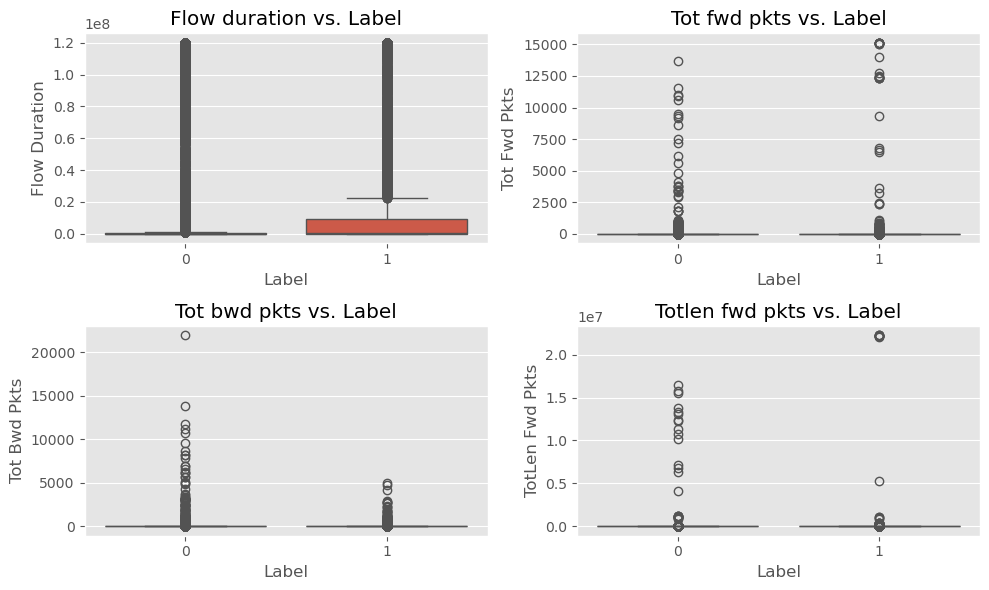

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Plotter class
class Plotter:
    
    def __init__(self, X, y):
        self.x_train = X
        self.y_train = y
        self.fig, self.axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))  
    
    def Plot_Box(self, row, col, x):
        ax = self.axes[row, col]  
        sns.boxplot(data=self.x_train, x=self.y_train, y=x, ax=ax)
        ax.set_title(f"{x.capitalize()} vs. Label")

    def Show_Plots(self):
        plt.tight_layout()
        plt.show()

# Initialize the Plotter with  dataset
plot_continuous_features = Plotter(X_train, y_train)

# List of continuous features (as previously identified)
continuous_features = [
    'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 
    'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 
    'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 
    'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 
    'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 
    'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 
    'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 
    'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 
    'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 
    'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 
    'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 
    'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio', 
    'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 
    'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 
    'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 
    'Idle Std', 'Idle Max', 'Idle Min'
]

# Plot the box plots
for i, col in enumerate(continuous_features[:4]):  # Plotting only the first 4 features for simplicity
    plot_continuous_features.Plot_Box(i // 2, i % 2, x=col)

# Show the plots
plot_continuous_features.Show_Plots()


check missing values

In [22]:
def calculate_missing_values(X_train, X_val, X_test):
    Miss_Train = X_train.isna().sum()
    Miss_Val = X_val.isna().sum()
    Miss_Test = X_test.isna().sum()
    
    # Convert the series to dataframes
    output_train = pd.DataFrame(Miss_Train, columns=['Missing Values X_train'])
    output_val = pd.DataFrame(Miss_Val, columns=['Missing Values X_val'])
    output_test = pd.DataFrame(Miss_Test, columns=['Missing Values X_test'])

    # Concatenate the dataframes output_train, output_val, and output_test
    output = pd.concat([output_train, output_val, output_test], axis=1, join='inner')

    return output

# Execute the function
output = calculate_missing_values(X_train, X_val, X_test)

# Define a function to apply the desired styling
def color_cell(value):
    if value >= 20:
        return 'background-color:#2e9ee8'
    elif value >= 10 and value < 20:
        return 'background-color:#7ac1f0'
    elif value >= 1 and value < 10:
        return 'background-color:#bdddf2'
    return ''

# Apply the styling to the DataFrame
styled_df = output.style.applymap(color_cell)

output

,Missing Values X_train,Missing Values X_val,Missing Values X_test
Flow Duration,0,0,0
Tot Fwd Pkts,0,0,0
Tot Bwd Pkts,0,0,0
TotLen Fwd Pkts,0,0,0
TotLen Bwd Pkts,0,0,0
Fwd Pkt Len Max,0,0,0
Fwd Pkt Len Min,0,0,0
Fwd Pkt Len Mean,0,0,0
Fwd Pkt Len Std,0,0,0
Bwd Pkt Len Max,0,0,0


In [23]:
# Function to find rows with 50% or more null values in a dataset
def find_rows_with_high_null_values(df):
    threshold = 0.5
    null_threshold = int(threshold * len(df.columns))
    null_rows = df[df.apply(lambda x: x.isnull().sum(), axis=1) >= null_threshold]
    num_null_rows = len(null_rows)
    print(f"The number of rows consisting of more than 50% missing values is: {num_null_rows}")
    return null_rows

# Example usage WITH datasets:
null_rows_X_train = find_rows_with_high_null_values(X_train)
null_rows_X_val = find_rows_with_high_null_values(X_val)
null_rows_X_test = find_rows_with_high_null_values(X_test)

# Displaying the results
null_rows_X_train, null_rows_X_val, null_rows_X_test


The number of rows consisting of more than 50% missing values is: 0
The number of rows consisting of more than 50% missing values is: 0
The number of rows consisting of more than 50% missing values is: 0


(Empty DataFrame
 Columns: [Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Mean, Fwd Pkt Len Std, Bwd Pkt Len Max, Bwd Pkt Len Min, Bwd Pkt Len Mean, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Bwd PSH Flags, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Bwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, FIN Flag Cnt, SYN Flag Cnt, RST Flag Cnt, ACK Flag Cnt, Down/Up Ratio, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Init Bwd Win Byts, Fwd Act Data Pkts, Active Mean, Active Std, Active Max, Active Min, Idle Mean, Idle Std, Idle Max, Idle Min]
 Index: []
 
 [0 rows x 57 columns],
 Empty DataFrame
 Columns: [Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Ma

In [24]:
# Function to calculate the mean of a column in a DataFrame
def calculate_mean(df, column):
    mean = df[column].mean().round()
    return mean

# Example columns to calculate mean for
columns_to_calculate = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts']

# Calculate and print the mean for each column in the training, validation, and test sets
for col in columns_to_calculate:
    print(f'Mean {col} in Trainset is: {calculate_mean(X_train, col)}')
    print(f'Mean {col} in Valset is: {calculate_mean(X_val, col)}')
    print(f'Mean {col} in Testset is: {calculate_mean(X_test, col)}')


Mean Flow Duration in Trainset is: 10680163.0
Mean Flow Duration in Valset is: 10856637.0
Mean Flow Duration in Testset is: 10780137.0
Mean Tot Fwd Pkts in Trainset is: 11.0
Mean Tot Fwd Pkts in Valset is: 9.0
Mean Tot Fwd Pkts in Testset is: 10.0
Mean Tot Bwd Pkts in Trainset is: 13.0
Mean Tot Bwd Pkts in Valset is: 16.0
Mean Tot Bwd Pkts in Testset is: 13.0
Mean TotLen Fwd Pkts in Trainset is: 5737.0
Mean TotLen Fwd Pkts in Valset is: 4148.0
Mean TotLen Fwd Pkts in Testset is: 5961.0


In [25]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


C:\Users\ys483\AppData\Local\Temp\ipykernel_40516\2750294521.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='hls')
C:\Users\ys483\AppData\Local\Temp\ipykernel_40516\2750294521.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='hls')


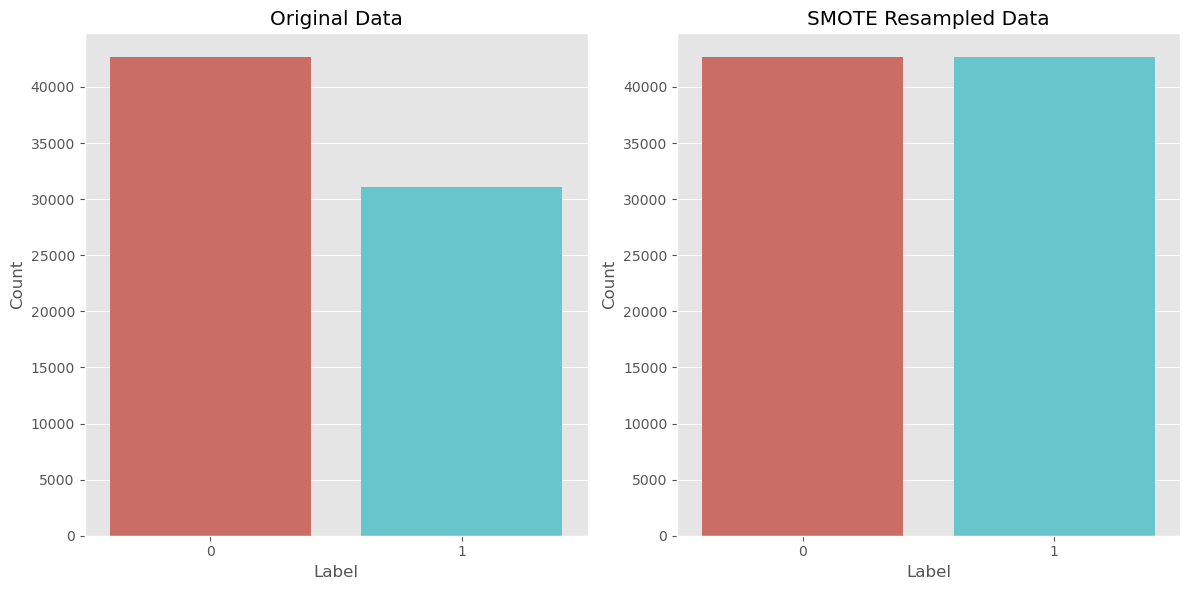

Before SMOTE: (73769, 57)
After SMOTE: (85302, 57)


In [26]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Using SMOTE Technique to Balance the Training Set
# First, visualize the original distribution of the target variable
plt.figure(figsize=(12, 6))

# First subplot: Original data distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='hls')
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('Original Data')

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Second subplot: SMOTE resampled data distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette='hls')
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('SMOTE Resampled Data')

# Adjust the layout and display the figures
plt.tight_layout()
plt.show()

# Display the shape of the datasets before and after SMOTE
print("Before SMOTE:", X_train.shape)
print("After SMOTE:", X_train_resampled.shape)


Index(['Unnamed: 0', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 

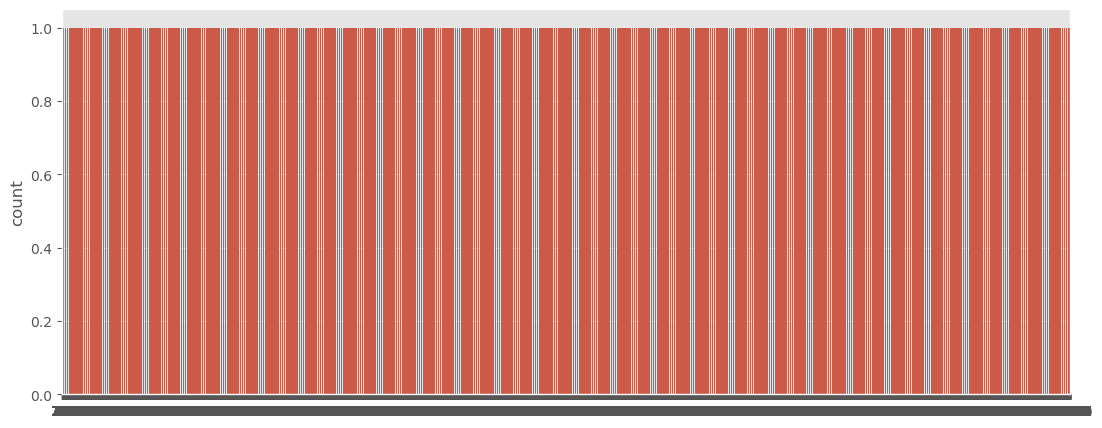

The class ratio for the original data: 1.4:1 (53314/38898)


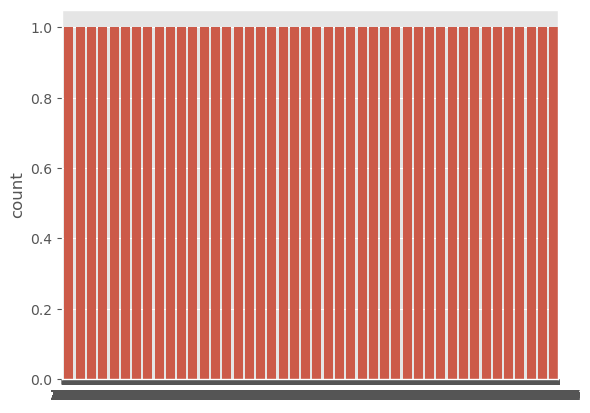

       Unnamed: 0  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts   
0               0       59086131             7             1                0  \
1               1       12452268            37             1             2408   
2               2      118741070             5             4              170   
3               3         180643            25            11              180   
4               4            440             4             1                0   
...           ...            ...           ...           ...              ...   
92207       53311          36853             1             1                0   
92208       53312         944804             7             9             1235   
92209       53313            680             1             1                0   
92210       53314       10498434            11             8             3138   
92211       53315       14516050            13             1                0   

       TotLen Bwd Pkts  Fwd

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data into a DataFrame
CTU13_data = pd.read_csv('FINAL YEAR PROJECT.csv')

# Print the columns of the DataFrame
print(CTU13_data.columns)

# Strip any whitespace from the column names
CTU13_data.columns = CTU13_data.columns.str.strip()

# Print the cleaned column names
print(CTU13_data.columns)


plt.style.use('ggplot')
print(CTU13_data.columns)
CTU13_data.columns = CTU13_data.columns.str.strip()
print(CTU13_data.columns)
X = CTU13_data.drop(axis=1, columns=['Flow Duration']) # X is a dataframe
X = X.drop(axis=1, columns=['Label'])


y1 = CTU13_data['Flow Duration'].values # y is an array
y2 = CTU13_data['Label'].values
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'
print('The class ratio for the original data:', data_ratio(y1))
plt.figure(figsize=(13,5))
sns.countplot(y1,label="Sum")
plt.show()

print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()
# separating the features and target

features =CTU13_data.drop(columns='Label', axis=1)

target = CTU13_data['Label']
print(features)
print(target)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the processed features and target after SMOTE
# Combine X_train_new and y_train_resampled
train_copy = pd.concat([X_train, y_train_resampled], axis=1)

# Calculate the correlation matrix
corr_matrix = train_copy.corr()

# Plot the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", ax=ax)
ax.set_title('Correlation Matrix')
plt.show()


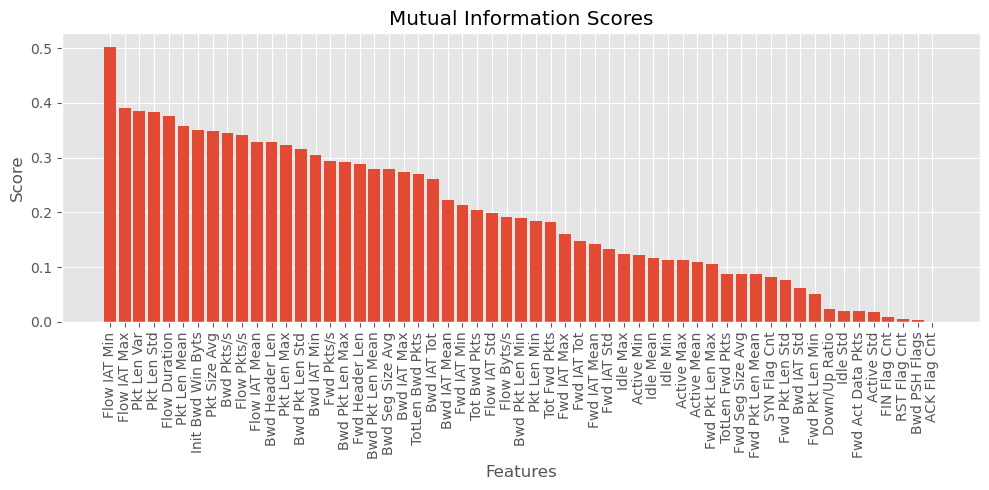

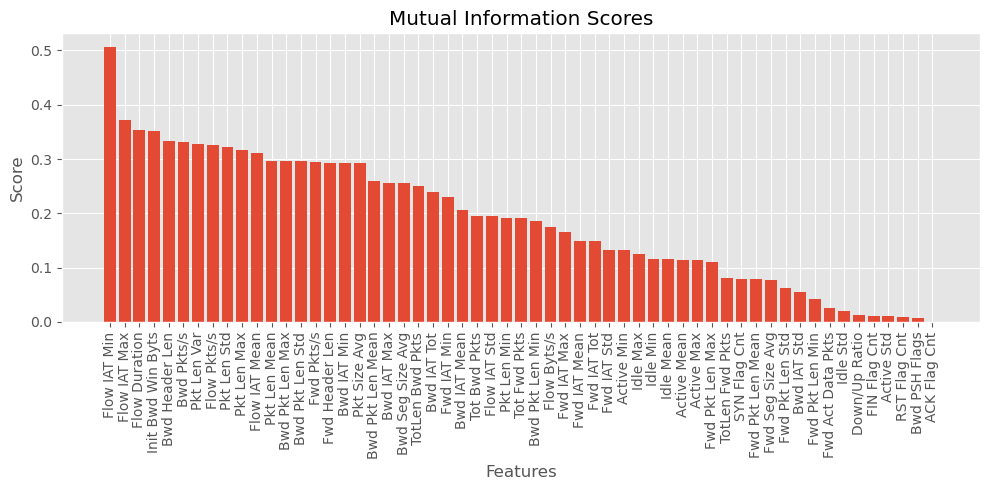

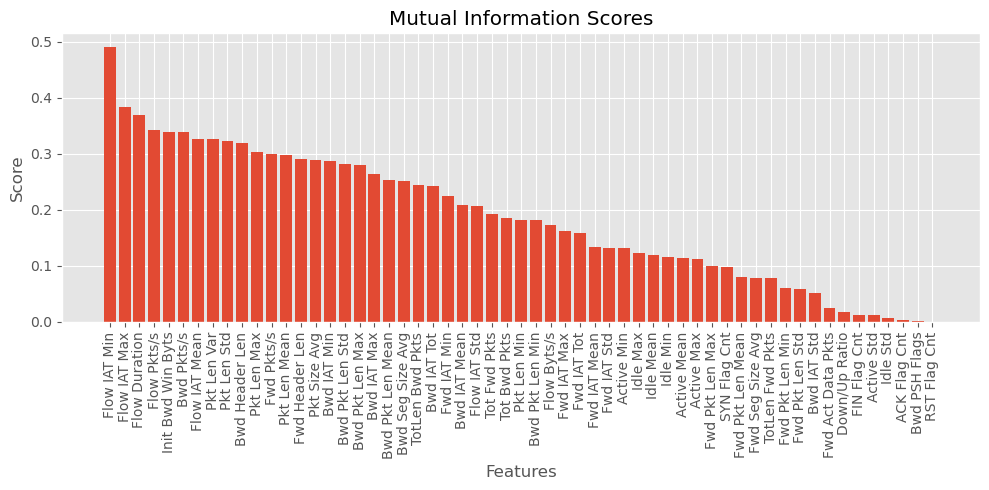

In [29]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt

# Ensure that X_train_resampled and y_train_resampled are used after SMOTE
X_train_resampled = X_train_resampled  # Ensure these variables are defined after SMOTE
y_train_resampled = y_train_resampled

# Mutual Information Analysis
# Loop through the training, validation, and test sets to calculate and plot mutual information scores
for X, y in zip([X_train_resampled, X_val, X_test], [y_train_resampled, y_val, y_test]):
    feature_names = X.columns
    scores = mutual_info_classif(X, y, random_state=42)

    # Create an array of indices for sorting the scores and feature names
    indices = np.argsort(scores)[::-1]

    # Sort the scores and feature names based on the indices
    sorted_scores = scores[indices]
    sorted_feature_names = [feature_names[i] for i in indices]

    # Plot the bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(sorted_scores)), sorted_scores)
    plt.xticks(range(len(sorted_scores)), sorted_feature_names, rotation='vertical')
    plt.title("Mutual Information Scores")
    plt.xlabel("Features")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()


Data Standardization

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data into a DataFrame
CTU13_data = pd.read_csv('FINAL YEAR PROJECT.csv')

# Strip any whitespace from the column names
CTU13_data.columns = CTU13_data.columns.str.strip()

# Separating the features (excluding 'Label') and target
features = CTU13_data.drop(columns='Label', axis=1)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [31]:
standardized_data = scaler.transform(features)

In [32]:
print(standardized_data)

[[-1.65830086e+00  1.78648103e+00 -1.58351708e-02 ...  4.93285485e+00
   2.75476371e+00  2.14757235e-01]
 [-1.65823064e+00  6.44181893e-02  1.04634166e-01 ... -1.27524367e-01
  -3.26271257e-01 -3.09740008e-01]
 [-1.65816043e+00  3.98937710e+00 -2.38664599e-02 ... -1.27524367e-01
   8.37563005e+00  9.84293993e+00]
 ...
 [ 2.08511641e+00 -3.95385387e-01 -3.99290381e-02 ... -1.27524367e-01
  -3.26271257e-01 -3.09740008e-01]
 [ 2.08518663e+00 -7.73163285e-03  2.27407451e-04 ... -1.27524367e-01
  -3.26271257e-01 -3.09740008e-01]
 [ 2.08525684e+00  1.40628095e-01  8.25869656e-03 ... -1.27524367e-01
   5.31406887e-02  1.32927394e-01]]


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply PCA
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_resampled)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Explained variance information
explained_variance = {
    "Number of components after PCA": X_train_pca.shape[1],
    "Explained variance ratio (first 5 components)": pca.explained_variance_ratio_[:5],
    "Cumulative explained variance": sum(pca.explained_variance_ratio_)
}

# Train a model on the original features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_val_pred = model.predict(X_val)
original_feature_performance = classification_report(y_val, y_val_pred, output_dict=True)

# Train on the PCA-transformed features
model.fit(X_train_pca, y_train_resampled)
y_val_pca_pred = model.predict(X_val_pca)
pca_feature_performance = classification_report(y_val, y_val_pca_pred, output_dict=True)

# Test set performance with PCA
y_test_pred = model.predict(X_test_pca)
test_set_pca_performance = classification_report(y_test, y_test_pred, output_dict=True)

# Displaying all results
{
    "Explained Variance": explained_variance,
    "Original Feature Set Performance": original_feature_performance,
    "PCA-Transformed Feature Set Performance": pca_feature_performance,
    "Test Set Performance with PCA-Transformed Features": test_set_pca_performance
}

{'Explained Variance': {'Number of components after PCA': 4,
  'Explained variance ratio (first 5 components)': array([0.73837917, 0.13173705, 0.05656902, 0.03144323]),
  'Cumulative explained variance': 0.9581284635221091},
 'Original Feature Set Performance': {'0': {'precision': 0.9977469019902365,
   'recall': 0.9968111048583755,
   'f1-score': 0.9972787838979076,
   'support': 5331.0},
  '1': {'precision': 0.995635430038511,
   'recall': 0.9969151670951156,
   'f1-score': 0.9962748876043674,
   'support': 3890.0},
  'accuracy': 0.9968550048801649,
  'macro avg': {'precision': 0.9966911660143738,
   'recall': 0.9968631359767456,
   'f1-score': 0.9967768357511375,
   'support': 9221.0},
  'weighted avg': {'precision': 0.9968561498058516,
   'recall': 0.9968550048801649,
   'f1-score': 0.996855277056798,
   'support': 9221.0}},
 'PCA-Transformed Feature Set Performance': {'0': {'precision': 0.9615814994405073,
   'recall': 0.9671731382479835,
   'f1-score': 0.9643692135041616,
   'sup

Training the Model

Support Vector Machine Classifier


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the SVM_classifier class
class SVM_classifier:
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        y_label = np.where(self.Y <= 0, -1, 1)
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            if condition:
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat

In [35]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')

# Ensure that only numerical data is processed
numerical_features = CTU13_data.drop(columns=['Set'])  # Exclude the 'Set' column

# Identify the target column (e.g., 'Label')
target_column = 'Label'

# Separate the features and target
features = numerical_features.drop(columns=target_column, axis=1)
target = numerical_features[target_column]

# Convert features and target to numpy arrays
X = np.array(features, dtype=float)
y = np.array(target, dtype=float)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Apply StandardScaler (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (dimensionality reduction) if necessary
pca = PCA(n_components=0.95, random_state=42)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Initialize and train the SVM classifier using the preprocessed data
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)
classifier.fit(X_train_reduced, Y_train)

# Print the trained weights and bias
print("Trained weights:", classifier.w)
print("Trained bias:", classifier.b)

# Make predictions on the test set
predictions = classifier.predict(X_test_reduced)

# Print the predictions
print(predictions)


Trained weights: [ 0.32914626  0.54024312  0.35471994  0.15159585  0.10945053  0.47887045
  0.95082689  0.2961205  -0.04380221 -0.29030135  0.53289332  0.28453322
  0.01476531  0.43309481 -0.21019938  0.17419721  0.36191754  0.33858381
  0.11947964  0.26861294 -0.05689604 -0.28702523]
Trained bias: 0.1800000000000001
[1 0 1 ... 1 0 0]


In [36]:
#Accuracy score 
# After preprocessing, ensure that X_train_reduced has the correct number of features
print("X_train shape:", X_train_reduced.shape)  # Should match the number of features
print("Weight vector shape:", classifier.w.shape)  # Should match the number of features

# Re-initialize the SVM classifier with the correct number of features
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

# Train the classifier again
classifier.fit(X_train_reduced, Y_train)
print("X_train shape:", X_train_reduced.shape)
print("Weight vector shape:", classifier.w.shape)
print("Prediction vector shape:", predictions.shape)
# Make predictions on the test set
X_test_prediction = classifier.predict(X_test_reduced)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Test data accuracy:', test_data_accuracy)

# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras


X_train shape: (73769, 22)
Weight vector shape: (22,)
X_train shape: (73769, 22)
Weight vector shape: (22,)
Prediction vector shape: (18443,)
Test data accuracy: 0.8405357046033726


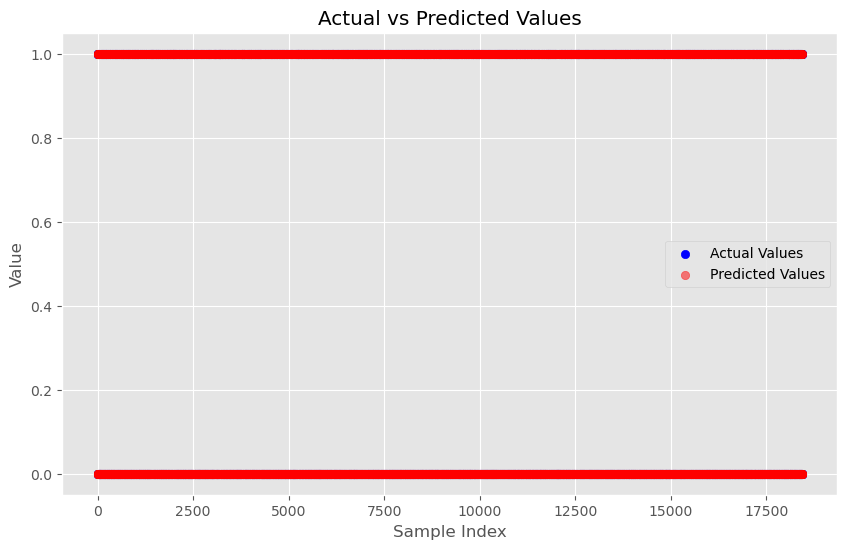

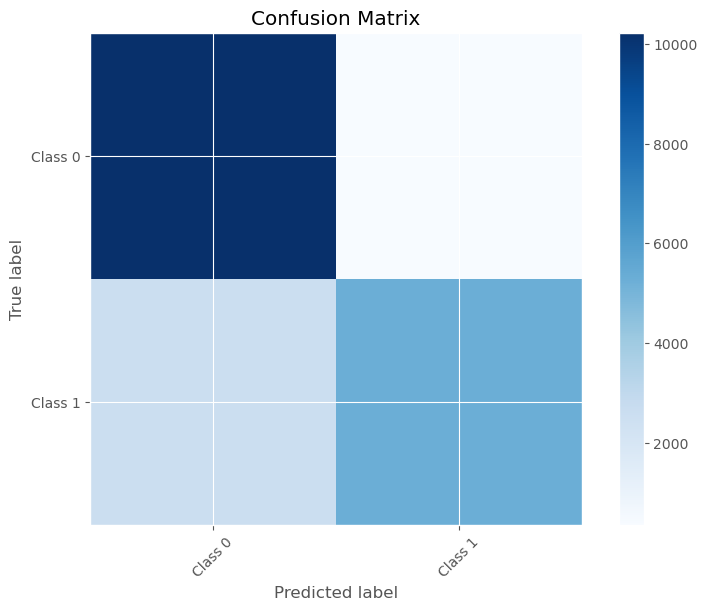

Test data accuracy: 0.8405357046033726


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(Y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Values')
    plt.scatter(range(len(predictions)), predictions, color='red', alpha=0.5, label='Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(Y_test, predictions):
    cm = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
    plt.yticks(tick_marks, ['Class 0', 'Class 1'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting the actual vs. predicted values
plot_actual_vs_predicted(Y_test, predictions)

# Plotting the confusion matrix
plot_confusion_matrix(Y_test, predictions)

# Plotting the accuracy score
accuracy = accuracy_score(Y_test, predictions)
print(f'Test data accuracy: {accuracy}')

# Since SVM does not have a loss function per se, we will not plot a loss graph.


Building a Predictive System

## Building Neural network  lstm 

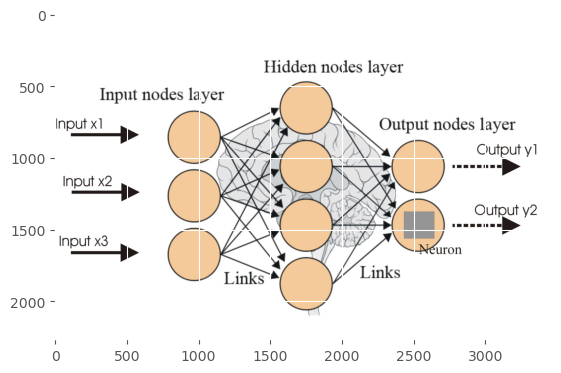

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display an image from a local file
img = mpimg.imread('Artificial-Intelligence-Neural-Network-Nodes.jpg')
imgplot = plt.imshow(img)
plt.show()


In [39]:
!pip install tensorflow


In [40]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras
print("X_train shape:", X_train.shape)  # Should be (number_of_samples, 58)


X_train shape: (73769, 23)


In [41]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(23,)),  # Adjusted to 23 features
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])


In [42]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Train the model
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
2075/2075 [==============================] - 3s 1ms/step - loss: 0.2353 - accuracy: 0.9068 - val_loss: 0.1630 - val_accuracy: 0.9405
Epoch 2/10
2075/2075 [==============================] - 2s 985us/step - loss: 0.1486 - accuracy: 0.9512 - val_loss: 0.1273 - val_accuracy: 0.9595
Epoch 3/10
2075/2075 [==============================] - 2s 967us/step - loss: 0.1224 - accuracy: 0.9613 - val_loss: 0.1246 - val_accuracy: 0.9578
Epoch 4/10
2075/2075 [==============================] - 2s 985us/step - loss: 0.1102 - accuracy: 0.9646 - val_loss: 0.1081 - val_accuracy: 0.9627
Epoch 5/10
2075/2075 [==============================] - 2s 983us/step - loss: 0.1018 - accuracy: 0.9662 - val_loss: 0.0942 - val_accuracy: 0.9671
Epoch 6/10
2075/2075 [==============================] - 2s 974us/step - loss: 0.0955 - accuracy: 0.9674 - val_loss: 0.0941 - val_accuracy: 0.9646
Epoch 7/10
2075/2075 [==============================] - 2s 985us/step - loss: 0.0910 - accuracy: 0.9684 - val_loss: 0.0875 - v

Visualizing accuracy and loss

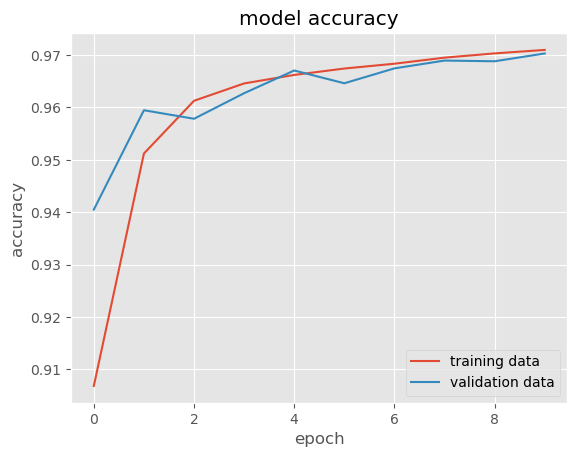

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

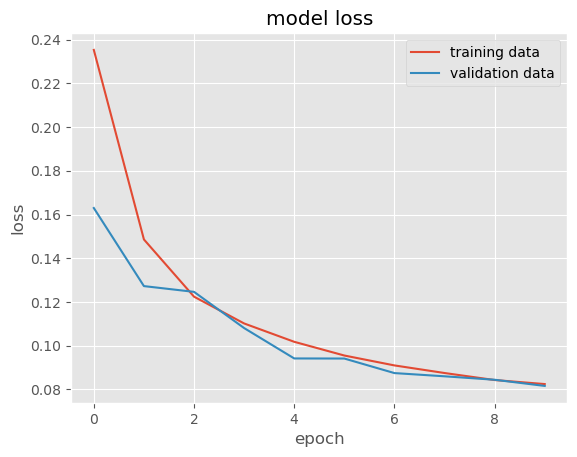

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')



Accuracy of the model on test data

In [46]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

577/577 [==============================] - 1s 858us/step - loss: 0.0862 - accuracy: 0.9707
0.9707205891609192


In [47]:
print(X_test.shape)   # This will print the shape of X_test
print(X_test[0])      # This will print the first element (or row) of X_test


(18443, 23)
[-1.95323905 -0.58660085 -1.20644447  2.03197886 -1.56042654  0.57299536
 -0.2898085   0.54537944 -0.2692566   0.45838471 -0.25120301  0.26131399
 -0.33431227 -0.04580169 -0.0533738  -0.51829982 -0.32470958  0.00405131
  0.32485697  0.03803106  0.01543333 -0.1083439  -0.73735194]


In [48]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming that the scaler has already been fitted with X_train
# Initialize and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler with the training data

# Standardize the test data
X_test_std = scaler.transform(X_test)

# Ensure X_test_std has the correct number of features (same as during training)
if X_test_std.shape[1] > len(classifier.w):
    X_test_std = X_test_std[:, :len(classifier.w)]
elif X_test_std.shape[1] < len(classifier.w):
    raise ValueError("Test data has fewer features than the model expects.")

# Make predictions on the standardized test data
Y_pred = classifier.predict(X_test_std)

print(Y_pred)


[0 0 0 ... 0 1 1]


In [49]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming the model was trained on 23 features
# and X_test_std has only 22 features

# If you know what the missing feature should be, you can add it:
# For example, add a column of zeros to match the shape
missing_feature = np.zeros((X_test_std.shape[0], 1))  # Replace with actual data if possible
X_test_std = np.hstack((X_test_std, missing_feature))

# Now, X_test_std should have 23 features
print(X_test_std.shape)  # Should print (number_of_samples, 23)

# Make predictions
Y_pred = model.predict(X_test_std)
print(Y_pred)


(18443, 23)
577/577 [==============================] - 0s 708us/step
[[0.00656666 0.9946667 ]
 [0.22935693 0.8993633 ]
 [0.04781291 0.9214828 ]
 ...
 [0.06644011 0.89202046]
 [0.966363   0.19865592]
 [0.75097394 0.20581073]]


In [50]:
print(Y_pred.shape)
print(Y_pred[0])

(18443, 2)
[0.00656666 0.9946667 ]


In [51]:
print(X_test)

[[-1.95323905e+00 -5.86600851e-01 -1.20644447e+00 ...  1.54333292e-02
  -1.08343896e-01 -7.37351940e-01]
 [-1.71289720e+00 -3.17871684e-01 -3.04321879e-01 ... -6.17343623e-02
  -6.04541929e-01 -6.91897207e-01]
 [-5.53731501e-01 -1.44109558e+00 -1.27384047e+00 ... -3.51739425e-04
   6.09074618e-02 -3.66671084e-01]
 ...
 [-5.76059288e-01 -1.45089948e+00 -1.28689798e+00 ... -5.25360619e-02
   5.34975497e-02 -3.20199950e-01]
 [-1.39284488e+00 -1.25007266e+00  3.06939092e-02 ... -7.80260506e-01
   6.93569079e-01  2.81791768e-01]
 [-5.72078289e-01  1.58334125e+00  1.64839663e-01 ... -5.52931561e-03
  -2.80441780e-01  2.26289208e-01]]


In [52]:
print(Y_pred)

[[0.00656666 0.9946667 ]
 [0.22935693 0.8993633 ]
 [0.04781291 0.9214828 ]
 ...
 [0.06644011 0.89202046]
 [0.966363   0.19865592]
 [0.75097394 0.20581073]]


model.predict() gives the prediction probability of each class for that data point

In [53]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [54]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 

Building the predictive system

In [55]:
# Apply PCA with exactly 23 components
pca = PCA(n_components=23, random_state=42)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Check the number of components after PCA
print(f"Number of PCA components: {X_train_reduced.shape[1]}")  # Should print 23

# Define the neural network model with the correct input shape
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(23,)),  # Match the PCA output
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Verify PCA transformation on input data
input_data_pca = X_test_reduced

# Ensure the input shape matches the model's expected input shape
if input_data_pca.shape[1] != 23:
    raise ValueError(f"Expected 23 features, but got {input_data_pca.shape[1]} after PCA.")

# Now you can use the model to make predictions
prediction = model.predict(input_data_pca)
print(prediction)

prediction_label = np.argmax(prediction, axis=1)
print(prediction_label)

if prediction_label[0] == 0:
    print('A')
else:
    print('B')


Number of PCA components: 23
577/577 [==============================] - 0s 717us/step
[[0.5829917  0.7085618 ]
 [0.657561   0.6430173 ]
 [0.5535651  0.47044796]
 ...
 [0.5415962  0.47476083]
 [0.6123099  0.5357155 ]
 [0.5575067  0.49588102]]
[1 0 0 ... 0 0 0]
B


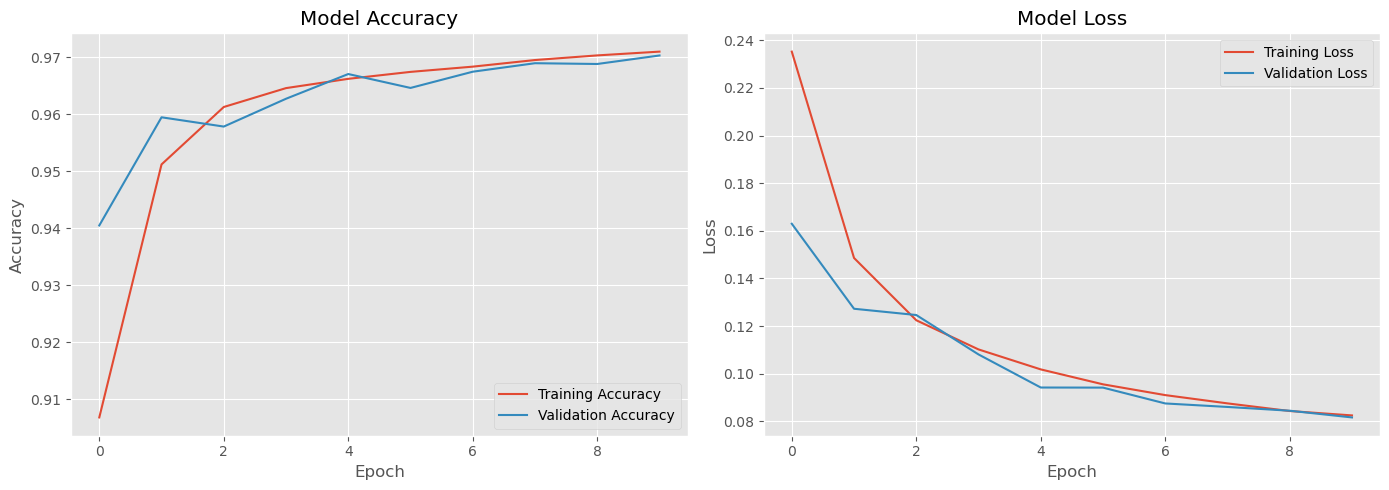

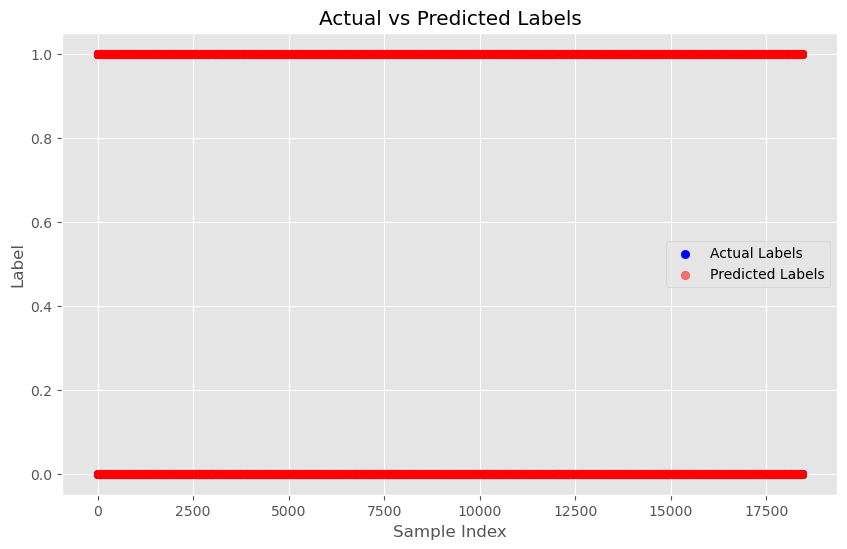

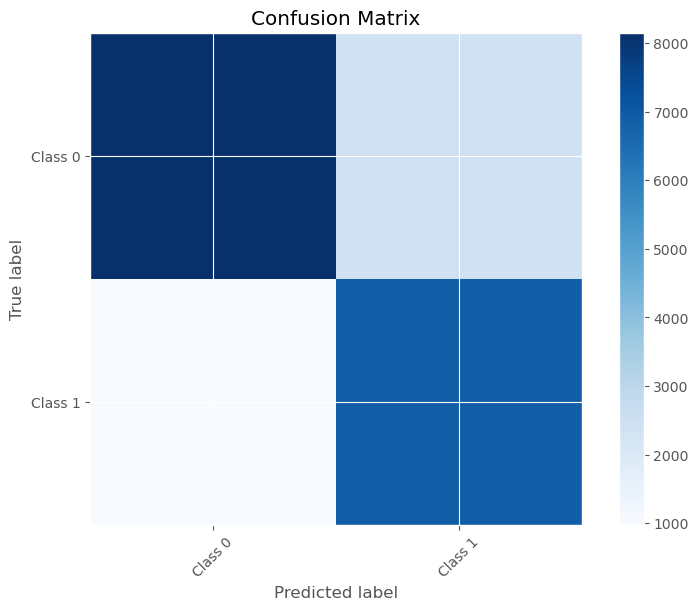

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Convert predicted probabilities to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]

# Plotting Actual vs Predicted Labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Labels')
plt.scatter(range(len(Y_pred_labels)), Y_pred_labels, color='red', alpha=0.5, label='Predicted Labels')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


 ## Building Hybrid Model for lstm and svm 

In [57]:
!pip install scikit-learn


In [58]:

!pip install tensorflow


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Load and preprocess your data
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')

# Drop any non-numeric columns and separate the target
features = CTU13_data.drop(columns=['Label', 'Set'], axis=1)  # Drop 'Set' column
target = CTU13_data['Label']

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, target, test_size=0.2, random_state=2)

# Define your base SVM model
svm = SVC(kernel='linear', probability=True)

# Define your base LSTM model
def create_base_lstm_model(input_shape):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(input_shape,)),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the base LSTM model
base_lstm_model = create_base_lstm_model(X_train.shape[1])
base_lstm_model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

# Train the SVM model
svm.fit(X_train, Y_train)

# Get predictions from base models
svm_predictions = svm.predict_proba(X_train)[:, 1]  # Get probability of class 1
lstm_predictions = base_lstm_model.predict(X_train)[:, 1]  # Get probability of class 1

# Stack predictions to create a new feature set for the meta-model
stacked_predictions = np.vstack((svm_predictions, lstm_predictions)).T

# Define the meta LSTM model
def create_meta_lstm_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the meta LSTM model
meta_lstm_model = create_meta_lstm_model(stacked_predictions.shape[1])
meta_lstm_model.fit(stacked_predictions, Y_train, epochs=10, validation_split=0.1)

# Get predictions from base models for the test set
svm_test_predictions = svm.predict_proba(X_test)[:, 1]
lstm_test_predictions = base_lstm_model.predict(X_test)[:, 1]

# Stack test predictions
stacked_test_predictions = np.vstack((svm_test_predictions, lstm_test_predictions)).T

# Predict and evaluate the meta-model
meta_predictions = np.argmax(meta_lstm_model.predict(stacked_test_predictions), axis=1)
meta_accuracy = accuracy_score(Y_test, meta_predictions)
print('Hybrid Model (SVM + LSTM) Accuracy:', meta_accuracy)



Epoch 1/10
2075/2075 [==============================] - 3s 1ms/step - loss: 0.2415 - accuracy: 0.9129 - val_loss: 0.1578 - val_accuracy: 0.9481
Epoch 2/10
2075/2075 [==============================] - 2s 1ms/step - loss: 0.1444 - accuracy: 0.9552 - val_loss: 0.1258 - val_accuracy: 0.9597
Epoch 3/10
2075/2075 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9612 - val_loss: 0.1187 - val_accuracy: 0.9607
Epoch 4/10
2075/2075 [==============================] - 2s 1ms/step - loss: 0.1105 - accuracy: 0.9634 - val_loss: 0.1076 - val_accuracy: 0.9633
Epoch 5/10
2075/2075 [==============================] - 2s 1ms/step - loss: 0.1034 - accuracy: 0.9651 - val_loss: 0.0975 - val_accuracy: 0.9653
Epoch 6/10
2075/2075 [==============================] - 2s 1ms/step - loss: 0.0979 - accuracy: 0.9666 - val_loss: 0.1021 - val_accuracy: 0.9635
Epoch 7/10
2075/2075 [==============================] - 2s 1ms/step - loss: 0.0924 - accuracy: 0.9678 - val_loss: 0.0901 - val_accuracy:

Epoch 1/10
2075/2075 [==============================] - 2s 668us/step - loss: 0.2339 - accuracy: 0.9127 - val_loss: 0.1626 - val_accuracy: 0.9341
Epoch 2/10
2075/2075 [==============================] - 1s 652us/step - loss: 0.1534 - accuracy: 0.9428 - val_loss: 0.1328 - val_accuracy: 0.9500
Epoch 3/10
2075/2075 [==============================] - 1s 659us/step - loss: 0.1285 - accuracy: 0.9561 - val_loss: 0.1302 - val_accuracy: 0.9538
Epoch 4/10
2075/2075 [==============================] - 1s 660us/step - loss: 0.1152 - accuracy: 0.9614 - val_loss: 0.1099 - val_accuracy: 0.9622
Epoch 5/10
2075/2075 [==============================] - 1s 651us/step - loss: 0.1085 - accuracy: 0.9641 - val_loss: 0.1030 - val_accuracy: 0.9646
Epoch 6/10
2075/2075 [==============================] - 1s 667us/step - loss: 0.1018 - accuracy: 0.9653 - val_loss: 0.1027 - val_accuracy: 0.9639
Epoch 7/10
2075/2075 [==============================] - 1s 650us/step - loss: 0.0967 - accuracy: 0.9668 - val_loss: 0.0925 -

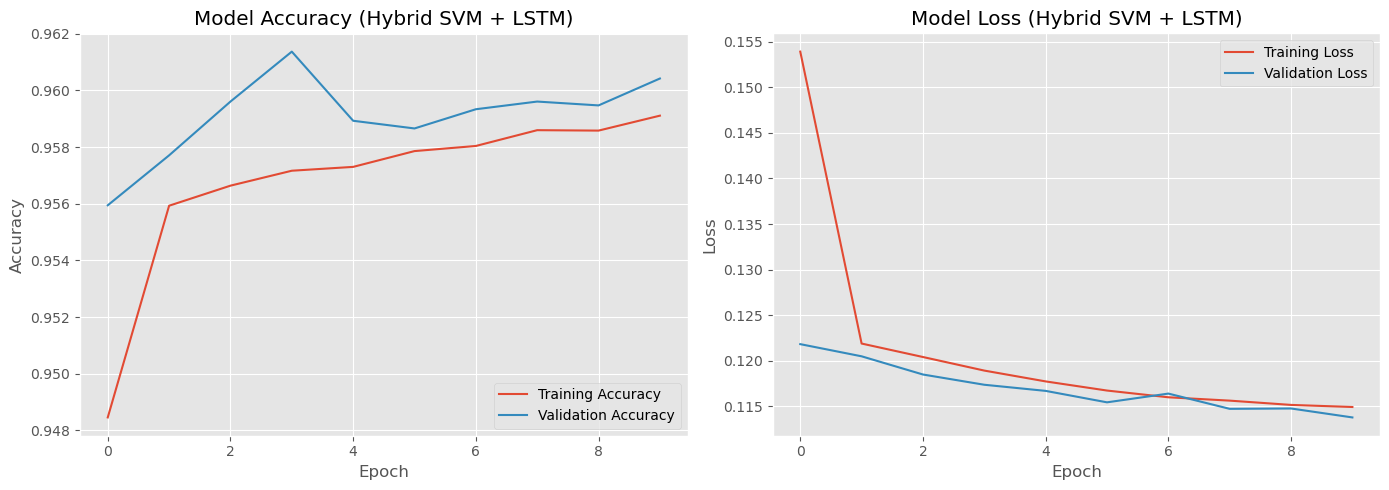

577/577 [==============================] - 0s 486us/step


<Figure size 800x600 with 0 Axes>

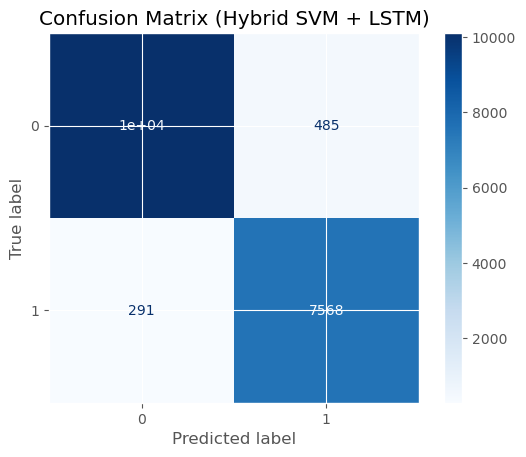

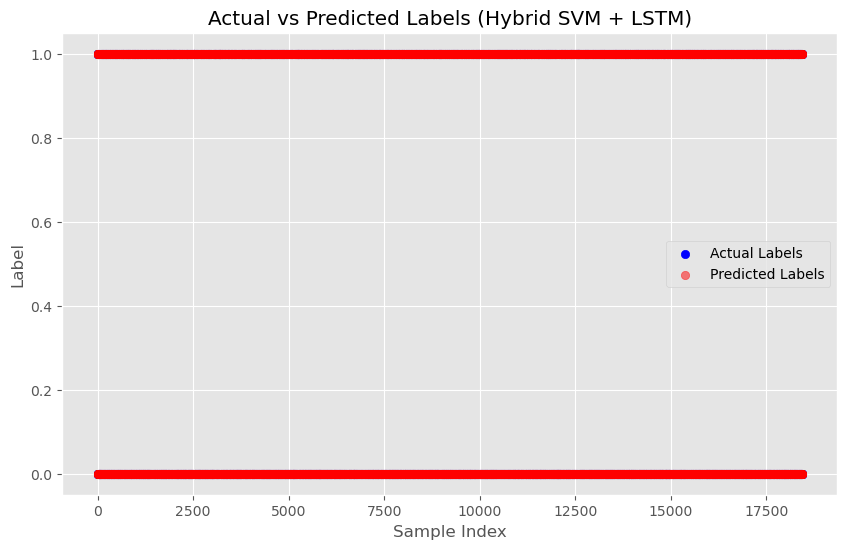

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# Define the function to create the base LSTM model
def create_base_lstm_model(input_shape):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(input_shape,)),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the function to create the meta LSTM model
def create_meta_lstm_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Assuming you've already loaded and preprocessed your data
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')
features = CTU13_data.drop(columns=['Label', 'Set'], axis=1)
target = CTU13_data['Label']

# Standardize the features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, target, test_size=0.2, random_state=2)

# Define your base SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, Y_train)

# Create and train the base LSTM model
base_lstm_model = create_base_lstm_model(X_train.shape[1])
base_lstm_model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

# Get predictions from base models
svm_train_predictions = svm_model.predict_proba(X_train)[:, 1]  # Get probability of class 1
lstm_train_predictions = base_lstm_model.predict(X_train)[:, 1]  # Get probability of class 1

# Stack predictions to create a new feature set for the meta-model
stacked_predictions = np.vstack((svm_train_predictions, lstm_train_predictions)).T

# Create and train the meta LSTM model
meta_lstm_model = create_meta_lstm_model(stacked_predictions.shape[1])
history = meta_lstm_model.fit(stacked_predictions, Y_train, epochs=10, validation_split=0.1)

# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Hybrid SVM + LSTM)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Hybrid SVM + LSTM)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Get predictions from base models for the test set
svm_test_predictions = svm_model.predict_proba(X_test)[:, 1]
lstm_test_predictions = base_lstm_model.predict(X_test)[:, 1]

# Stack test predictions
stacked_test_predictions = np.vstack((svm_test_predictions, lstm_test_predictions)).T

# Predict and evaluate the meta-model
meta_predictions = np.argmax(meta_lstm_model.predict(stacked_test_predictions), axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_test, meta_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Hybrid SVM + LSTM)')
plt.show()

# Plotting Actual vs Predicted Labels
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Labels')
plt.scatter(range(len(meta_predictions)), meta_predictions, color='red', alpha=0.5, label='Predicted Labels')
plt.title('Actual vs Predicted Labels (Hybrid SVM + LSTM)')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()


## logistic regression

In [61]:
# Install the required library if not already installed
!pip install scikit-learn

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load and preprocess your data
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')

# Drop the 'Set' column and separate the features and target
features = CTU13_data.drop(columns=['Label', 'Set'], axis=1)  # Remove 'Set' column
target = CTU13_data['Label']

# Standardize the features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, target, test_size=0.2, random_state=2)

# Define and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000)  # Increased max_iter to ensure convergence
logistic_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logistic_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy}')


Logistic Regression Model Accuracy: 0.851651032912216


In [63]:
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Replace X_train with your actual training data
input_data_std = scaler.transform(X_test)  # Standardize your test or input data

# Initialize and fit PCA
pca = PCA(n_components=23, random_state=42)  # Adjust n_components based on your requirement
X_train_pca = pca.fit_transform(X_train_scaled)
input_data_pca = pca.transform(input_data_std)

# Define the neural network model with the correct input shape
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),  # Adjust to match the PCA output
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Apply PCA transformation
input_data_pca = pca.transform(input_data_std)

# Ensure the input shape matches the model's expected input shape
if input_data_pca.shape[1] != 23:
    raise ValueError(f"Expected 23 features, but got {input_data_pca.shape[1]} after PCA.")


In [64]:

# Predict on the test set
Y_pred = logistic_model.predict(X_test)


In [65]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print('Logistic Regression Model Accuracy:', accuracy)


Logistic Regression Model Accuracy: 0.851651032912216


In [66]:
# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     10584
           1       0.86      0.78      0.82      7859

    accuracy                           0.85     18443
   macro avg       0.85      0.84      0.85     18443
weighted avg       0.85      0.85      0.85     18443



In [67]:
print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))



Confusion Matrix:
[[9601  983]
 [1753 6106]]


<Figure size 800x600 with 0 Axes>

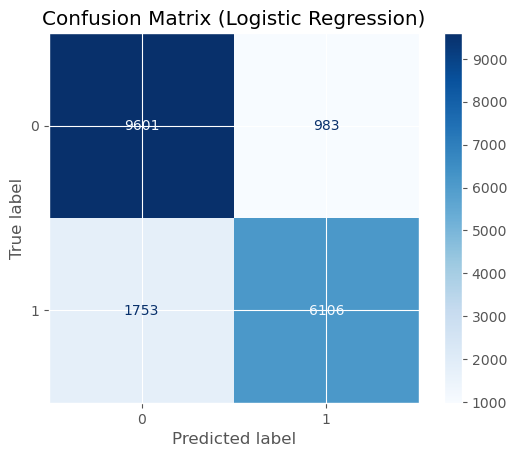

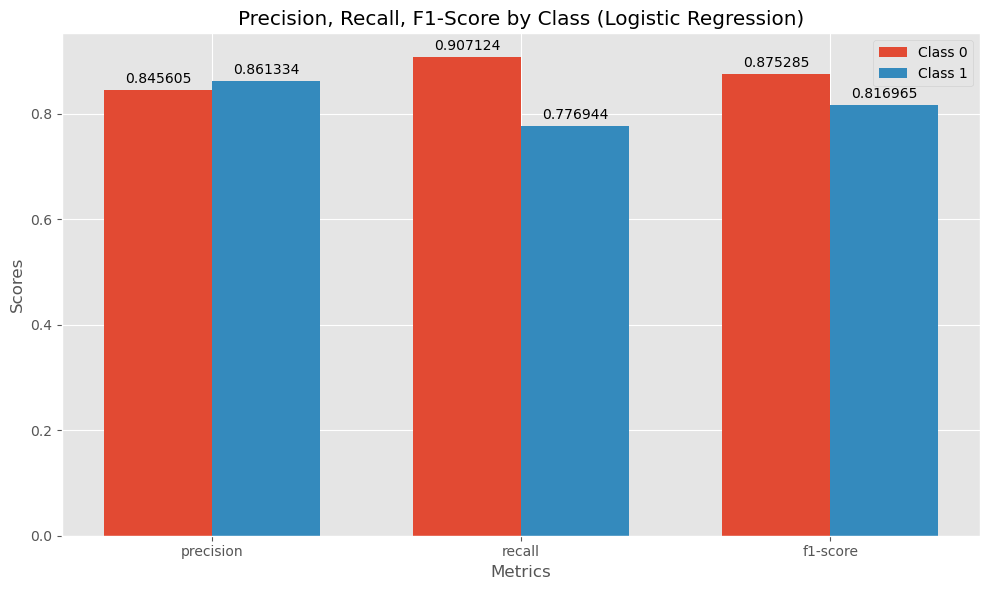

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Classification Report
report = classification_report(Y_test, Y_pred, output_dict=True)
categories = ['precision', 'recall', 'f1-score']

# Plotting Precision, Recall, F1-score
labels = ['Class 0', 'Class 1']
values_0 = [report['0'][metric] for metric in categories]
values_1 = [report['1'][metric] for metric in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='Class 0')
rects2 = ax.bar(x + width/2, values_1, width, label='Class 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score by Class (Logistic Regression)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add labels to the bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


## Random forest 

In [2]:
# Install the required library if not already installed
!pip install scikit-learn

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and preprocess your data
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')
features = CTU13_data.drop(columns='Label', axis=1)
target = CTU13_data['Label']

In [3]:
# import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and preprocess your data
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')

# Drop the 'Set' column and separate the features and target
features = CTU13_data.drop(columns=['Label', 'Set'], axis=1)  # Remove 'Set' column
target = CTU13_data['Label']

# Identify non-numeric columns
non_numeric_columns = features.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
features_numeric = features.drop(columns=non_numeric_columns)

# Standardize the features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features_numeric)



Non-numeric columns: Index([], dtype='object')


In [4]:


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, target, test_size=0.2, random_state=2)


In [5]:

# Define and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)
random_forest_model.fit(X_train, Y_train)


RandomForestClassifier(random_state=2)

In [6]:

# Predict on the test set
Y_pred = random_forest_model.predict(X_test)


In [7]:

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print('Random Forest Model Accuracy:', accuracy)


Random Forest Model Accuracy: 0.996150300927181


In [8]:

# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, Y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10584
           1       0.99      1.00      1.00      7859

    accuracy                           1.00     18443
   macro avg       1.00      1.00      1.00     18443
weighted avg       1.00      1.00      1.00     18443


Confusion Matrix:
[[10542    42]
 [   29  7830]]


<Figure size 800x600 with 0 Axes>

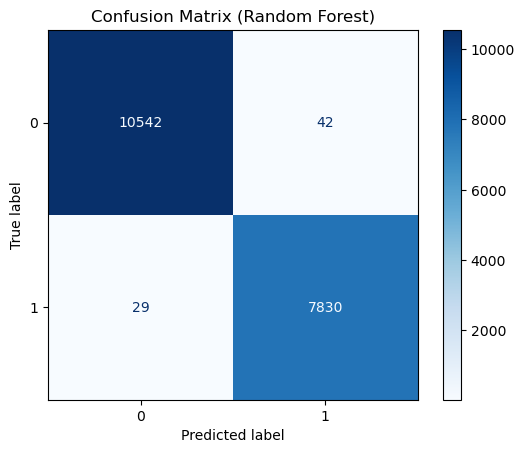

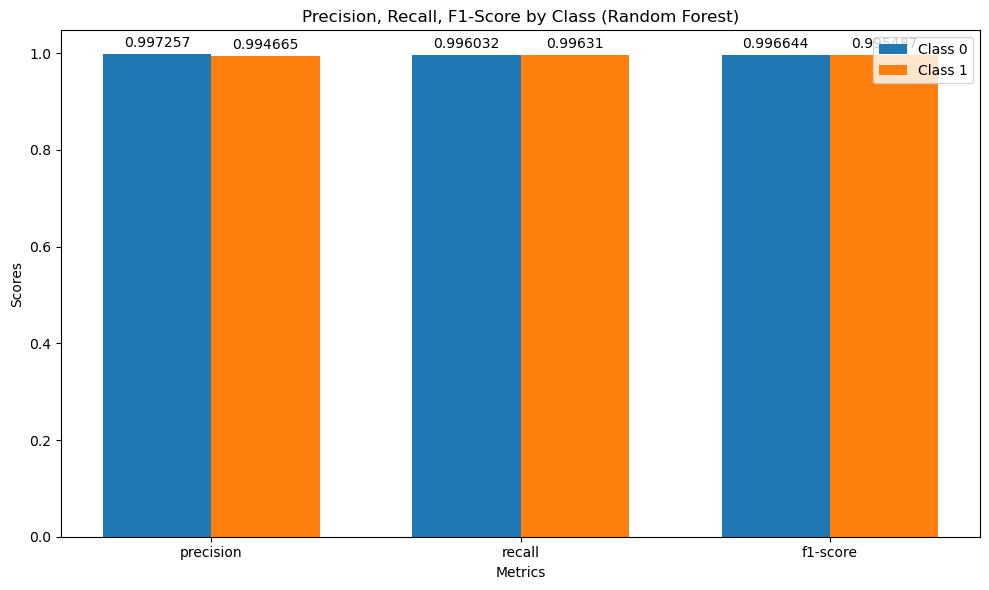

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Classification Report
report = classification_report(Y_test, Y_pred, output_dict=True)
categories = ['precision', 'recall', 'f1-score']

# Plotting Precision, Recall, F1-score
labels = ['Class 0', 'Class 1']
values_0 = [report['0'][metric] for metric in categories]
values_1 = [report['1'][metric] for metric in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='Class 0')
rects2 = ax.bar(x + width/2, values_1, width, label='Class 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score by Class (Random Forest)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add labels to the bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


## Hyrbid model of logistic regression and random forest 

In [77]:
# Install the required library if not already installed
!pip install scikit-learn

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load and preprocess your data
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')

# Drop non-numeric columns such as 'Set'
numerical_features = CTU13_data.drop(columns=['Set'], axis=1)

# Extract the target column
target = numerical_features.pop('Label')

# Standardize the features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_features)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, target, test_size=0.2, random_state=2)

# Define and train the base models
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)
random_forest_model.fit(X_train, Y_train)

logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train, Y_train)

# Now you can use these models to make predictions or evaluate them on the test data


LogisticRegression(max_iter=2000)

In [79]:
# Extract predictions from base models as new features
rf_train_predictions = random_forest_model.predict_proba(X_train)[:, 1]  # Probability of class 1
logistic_train_predictions = logistic_model.predict_proba(X_train)[:, 1]  # Probability of class 1

# Stack the predictions to create a new feature set for the final model
stacked_train_features = np.vstack((rf_train_predictions, logistic_train_predictions)).T

# Define and train the final model using the stacked features
final_model = LogisticRegression()
final_model.fit(stacked_train_features, Y_train)


LogisticRegression()

In [80]:

# Extract predictions from base models for the test set
rf_test_predictions = random_forest_model.predict_proba(X_test)[:, 1]
logistic_test_predictions = logistic_model.predict_proba(X_test)[:, 1]

# Stack the test predictions to create a new feature set for the final model
stacked_test_features = np.vstack((rf_test_predictions, logistic_test_predictions)).T

# Predict and evaluate the final model
final_predictions = final_model.predict(stacked_test_features)
final_accuracy = accuracy_score(Y_test, final_predictions)
print('Hybrid Model (Random Forest + Logistic Regression) Accuracy:', final_accuracy)


Hybrid Model (Random Forest + Logistic Regression) Accuracy: 0.9960418586997777


In [81]:
# Print classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, final_predictions))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, final_predictions))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10584
           1       0.99      1.00      1.00      7859

    accuracy                           1.00     18443
   macro avg       1.00      1.00      1.00     18443
weighted avg       1.00      1.00      1.00     18443


Confusion Matrix:
[[10542    42]
 [   31  7828]]


<Figure size 800x600 with 0 Axes>

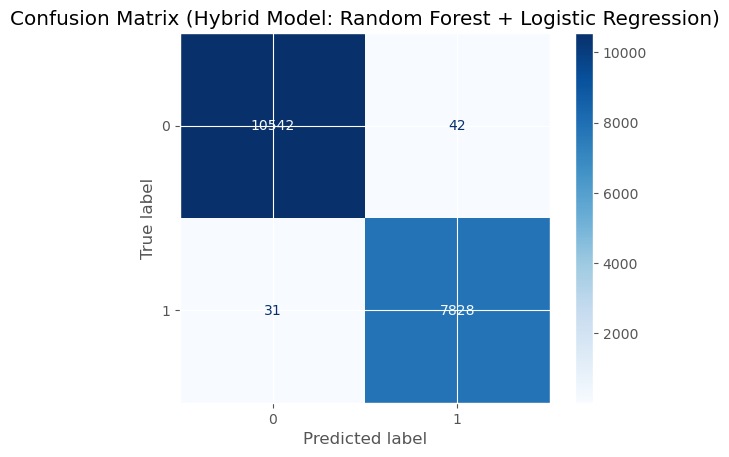

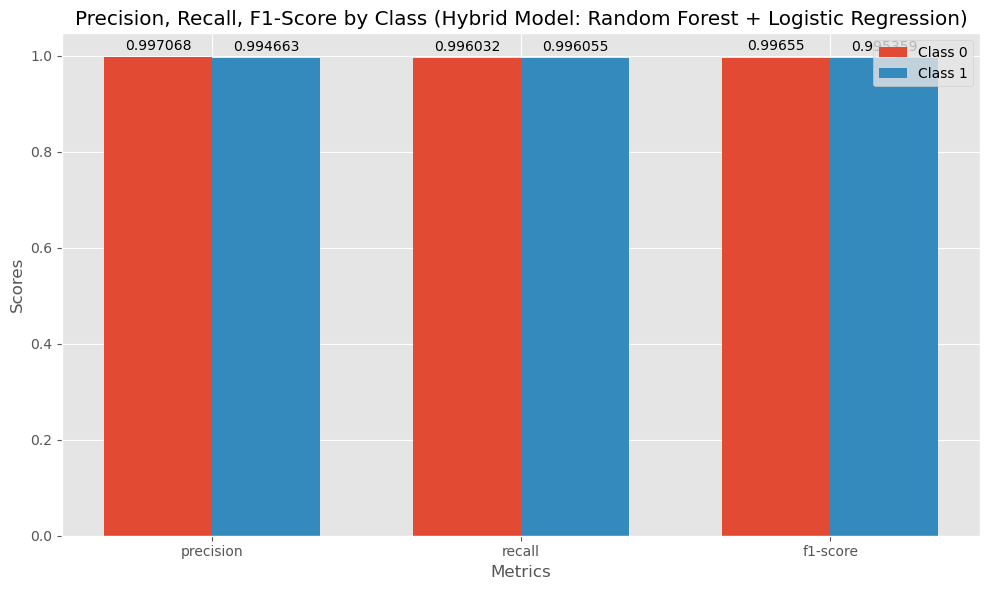

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(Y_test, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Hybrid Model: Random Forest + Logistic Regression)')
plt.show()

# Classification Report
report = classification_report(Y_test, final_predictions, output_dict=True)
categories = ['precision', 'recall', 'f1-score']

# Plotting Precision, Recall, F1-score
labels = ['Class 0', 'Class 1']
values_0 = [report['0'][metric] for metric in categories]
values_1 = [report['1'][metric] for metric in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_0, width, label='Class 0')
rects2 = ax.bar(x + width/2, values_1, width, label='Class 1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, F1-Score by Class (Hybrid Model: Random Forest + Logistic Regression)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add labels to the bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


## model comparision

In [11]:
# Install the required library if not already installed
!pip install scikit-learn tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess your data
CTU13_data = pd.read_csv('CombinedDataset_with_Target.csv')

# Drop non-numeric columns such as 'Set'
features = CTU13_data.drop(columns=['Label', 'Set'], axis=1)

# Extract the target column
target = CTU13_data['Label']

# Standardize the features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, target, test_size=0.2, random_state=2)

# Define and train the base models
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)
random_forest_model.fit(X_train, Y_train)

logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train, Y_train)

# Make predictions
rf_predictions = random_forest_model.predict(X_test)
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the models
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(Y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_test, rf_predictions))
print("Classification Report:\n", classification_report(Y_test, rf_predictions))


Random Forest Accuracy: 0.996150300927181
Logistic Regression Accuracy: 0.851651032912216
Confusion Matrix:
 [[10542    42]
 [   29  7830]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10584
           1       0.99      1.00      1.00      7859

    accuracy                           1.00     18443
   macro avg       1.00      1.00      1.00     18443
weighted avg       1.00      1.00      1.00     18443



In [3]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, target, test_size=0.2, random_state=2)
# Function to create LSTM model
def create_lstm_model(input_shape):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(input_shape,)),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Function to evaluate a model and return the accuracy
def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    return accuracy
    # Train and evaluate SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, Y_train)
svm_accuracy = evaluate_model(svm_model, X_test, Y_test)

In [4]:
# Train and evaluate LSTM model
lstm_model = create_lstm_model(X_train.shape[1])
lstm_model.fit(X_train, Y_train, epochs=10, validation_split=0.1)
lstm_predictions = np.argmax(lstm_model.predict(X_test), axis=1)
lstm_accuracy = accuracy_score(Y_test, lstm_predictions)

Epoch 1/10
2075/2075 [==============================] - 2s 657us/step - loss: 0.2475 - accuracy: 0.9028 - val_loss: 0.1687 - val_accuracy: 0.9378
Epoch 2/10
2075/2075 [==============================] - 1s 620us/step - loss: 0.1552 - accuracy: 0.9469 - val_loss: 0.1358 - val_accuracy: 0.9564
Epoch 3/10
2075/2075 [==============================] - 1s 621us/step - loss: 0.1327 - accuracy: 0.9586 - val_loss: 0.1199 - val_accuracy: 0.9622
Epoch 4/10
2075/2075 [==============================] - 1s 619us/step - loss: 0.1181 - accuracy: 0.9622 - val_loss: 0.1123 - val_accuracy: 0.9630
Epoch 5/10
2075/2075 [==============================] - 1s 605us/step - loss: 0.1072 - accuracy: 0.9651 - val_loss: 0.1010 - val_accuracy: 0.9687
Epoch 6/10
2075/2075 [==============================] - 1s 622us/step - loss: 0.0999 - accuracy: 0.9668 - val_loss: 0.0971 - val_accuracy: 0.9646
Epoch 7/10
2075/2075 [==============================] - 1s 605us/step - loss: 0.0938 - accuracy: 0.9678 - val_loss: 0.0959 -

In [5]:
# Train and evaluate Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
logistic_accuracy = evaluate_model(logistic_model, X_test, Y_test)

# Train and evaluate Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)
random_forest_model.fit(X_train, Y_train)
random_forest_accuracy = evaluate_model(random_forest_model, X_test, Y_test)

In [6]:

# Hybrid Model: SVM + LSTM
# Get predictions from base models as new features
svm_train_predictions = svm_model.predict_proba(X_train)[:, 1]
lstm_train_predictions = lstm_model.predict(X_train)[:, 1]


2306/2306 [==============================] - 1s 417us/step


In [7]:

# Stack the predictions to create a new feature set for the final model
stacked_train_features = np.vstack((svm_train_predictions, lstm_train_predictions)).T
meta_lstm_model = create_lstm_model(stacked_train_features.shape[1])
meta_lstm_model.fit(stacked_train_features, Y_train, epochs=10, validation_split=0.1)

# Get predictions from base models for the test set
svm_test_predictions = svm_model.predict_proba(X_test)[:, 1]
lstm_test_predictions = lstm_model.predict(X_test)[:, 1]

# Stack the test predictions to create a new feature set for the final model
stacked_test_features = np.vstack((svm_test_predictions, lstm_test_predictions)).T
meta_predictions = np.argmax(meta_lstm_model.predict(stacked_test_features), axis=1)
meta_accuracy = accuracy_score(Y_test, meta_predictions)

Epoch 1/10
2075/2075 [==============================] - 2s 662us/step - loss: 0.1954 - accuracy: 0.9428 - val_loss: 0.1632 - val_accuracy: 0.9466
Epoch 2/10
2075/2075 [==============================] - 1s 607us/step - loss: 0.1570 - accuracy: 0.9482 - val_loss: 0.1642 - val_accuracy: 0.9462
Epoch 3/10
2075/2075 [==============================] - 1s 611us/step - loss: 0.1570 - accuracy: 0.9480 - val_loss: 0.1624 - val_accuracy: 0.9481
Epoch 4/10
2075/2075 [==============================] - 1s 614us/step - loss: 0.1570 - accuracy: 0.9479 - val_loss: 0.1625 - val_accuracy: 0.9481
Epoch 5/10
2075/2075 [==============================] - 1s 609us/step - loss: 0.1568 - accuracy: 0.9482 - val_loss: 0.1624 - val_accuracy: 0.9479
Epoch 6/10
2075/2075 [==============================] - 1s 597us/step - loss: 0.1570 - accuracy: 0.9480 - val_loss: 0.1627 - val_accuracy: 0.9471
Epoch 7/10
2075/2075 [==============================] - 1s 605us/step - loss: 0.1570 - accuracy: 0.9482 - val_loss: 0.1629 -

In [8]:

# Hybrid Model: Random Forest + Logistic Regression
# Extract predictions from base models as new features
rf_train_predictions = random_forest_model.predict_proba(X_train)[:, 1]
logistic_train_predictions = logistic_model.predict_proba(X_train)[:, 1]

In [9]:
# Stack the predictions to create a new feature set for the final model
stacked_train_features_rf_lr = np.vstack((rf_train_predictions, logistic_train_predictions)).T
final_model = LogisticRegression()
final_model.fit(stacked_train_features_rf_lr, Y_train)


LogisticRegression()

In [10]:
# Extract predictions from base models for the test set
rf_test_predictions = random_forest_model.predict_proba(X_test)[:, 1]
logistic_test_predictions = logistic_model.predict_proba(X_test)[:, 1]

In [11]:

# Stack the test predictions to create a new feature set for the final model
stacked_test_features_rf_lr = np.vstack((rf_test_predictions, logistic_test_predictions)).T
final_predictions = final_model.predict(stacked_test_features_rf_lr)
final_accuracy = accuracy_score(Y_test, final_predictions)


In [12]:

# Print the accuracies of all models
print('SVM Accuracy:', svm_accuracy)
print('LSTM Accuracy:', lstm_accuracy)
print('Logistic Regression Accuracy:', logistic_accuracy)
print('Random Forest Accuracy:', random_forest_accuracy)
print('Hybrid Model (SVM + LSTM) Accuracy:', meta_accuracy)
print('Hybrid Model (Random Forest + Logistic Regression) Accuracy:', final_accuracy)

SVM Accuracy: 0.8951363661009597
LSTM Accuracy: 0.9677384373475031
Logistic Regression Accuracy: 0.851651032912216
Random Forest Accuracy: 0.996150300927181
Hybrid Model (SVM + LSTM) Accuracy: 0.9489779320067234
Hybrid Model (Random Forest + Logistic Regression) Accuracy: 0.9960418586997777


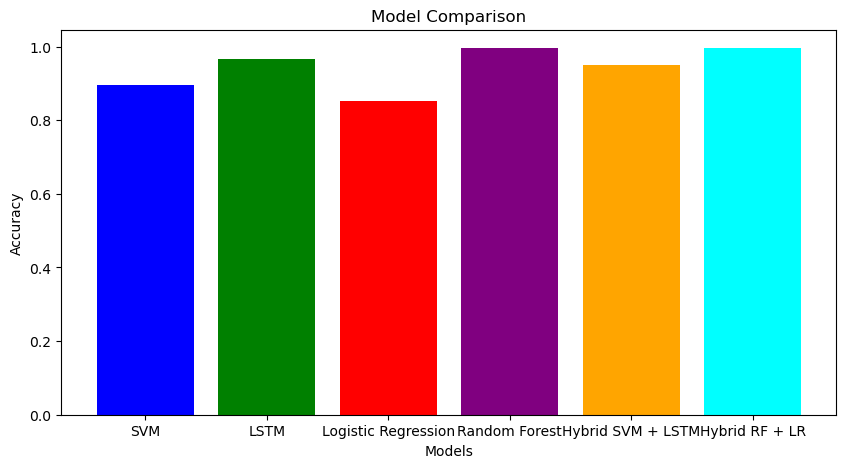

In [13]:
# Plotting accuracies for comparison
models = ['SVM', 'LSTM', 'Logistic Regression', 'Random Forest', 'Hybrid SVM + LSTM', 'Hybrid RF + LR']
accuracies = [svm_accuracy, lstm_accuracy, logistic_accuracy, random_forest_accuracy, meta_accuracy, final_accuracy]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()
